# Hands-On Data Preprocessing in Python
Learn how to effectively prepare data for successful data analytics
    
    AUTHOR: Dr. Roy Jafari 

### Chapter 11: Data Cleaning - Level ⅠⅡ 
#### Exercises

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Exercise 1
In this exercise, we will be using 'Temperature_data.csv'. This dataset has some missing values. Do the following.

    a. After reading the file into a Pandas DataFrame, check if the dataset is level Ⅰ clean and if not clean it. Also, describe the cleanings if any.

In [2]:
day_df = pd.read_csv('Temperature_data.csv')
day_df.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,RI2,TMP,1/1/2019 0:00,9.0,oC,P
1,RI2,TMP,2/1/2019 0:00,6.0,oC,P
2,RI2,TMP,3/1/2019 0:00,5.0,oC,P
3,RI2,TMP,4/1/2019 0:00,4.0,oC,P
4,RI2,TMP,5/1/2019 0:00,5.0,oC,P


In [3]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Site                     365 non-null    object 
 1   Species                  365 non-null    object 
 2   ReadingDateTime          365 non-null    object 
 3   Value                    351 non-null    float64
 4   Units                    365 non-null    object 
 5   Provisional or Ratified  365 non-null    object 
dtypes: float64(1), object(5)
memory usage: 17.2+ KB


In [4]:
# This makes me wonder if there are different units of measurement. If there are, then we would need to convert them to the same unit.
day_df.Units.unique()

array(['oC'], dtype=object)

In [5]:
# What are the options here?
day_df['Provisional or Ratified'].unique()

array(['P'], dtype=object)

In [6]:
# It appears that this column doesn't add any information. All values are 'P' (provisional).
(day_df['Provisional or Ratified'] == 'P').sum()

365

*Is this level 1 clean?*  
No, it is not yet.  

Issues present:
1) ReadingDateTime is not in the appropriate date type for a date
2) 'Provisional or Ratified' doesn't add any information...
3) The units are all the same.
4) The column name 'Values' isn't very descriptive. It contains the temperature in degrees celcius.

In [7]:
# The ReadingDateTime column is an object, but we want it to be a datetime
# Watch out for the format of the date and time, it is day/month/year not month/day/year
day_df['ReadingDateTime'] = pd.to_datetime(day_df.ReadingDateTime, format='%d/%m/%Y %H:%M')
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Site                     365 non-null    object        
 1   Species                  365 non-null    object        
 2   ReadingDateTime          365 non-null    datetime64[ns]
 3   Value                    351 non-null    float64       
 4   Units                    365 non-null    object        
 5   Provisional or Ratified  365 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 17.2+ KB


In [8]:
day_df.columns = ['Site', 'Species', 'ReadingDateTime', 'DegreesCelcius', 'Units', 'ProvisionalOrRatified']
day_df = day_df.drop(['Units', 'ProvisionalOrRatified'], axis=1)

In [9]:
day_df.head()

,Site,Species,ReadingDateTime,DegreesCelcius
0,RI2,TMP,2019-01-01,9.0
1,RI2,TMP,2019-01-02,6.0
2,RI2,TMP,2019-01-03,5.0
3,RI2,TMP,2019-01-04,4.0
4,RI2,TMP,2019-01-05,5.0


    c.	The dataset has missing values. See how many, and run diagnosis to see what types of missing values they are. 

In [10]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Site             365 non-null    object        
 1   Species          365 non-null    object        
 2   ReadingDateTime  365 non-null    datetime64[ns]
 3   DegreesCelcius   351 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 11.5+ KB


*The missing values are in the column that used to be named 'Values' that I renamed 'DegreesCelcius'.*

What are the methods for diagnosing the missing values?
1) Visually - Use boxplots or histograms to see what removing the values does.
2) Stats - two-sample t-test to see if there is a meaning relationship.
3) Stats - chi-square test of independence to see if there is a meaningful relationship between the missing values and other attributs in the dataset.

If we try to follow the examble from the book, we will get hung up because the missing values are only in the DegreesCelcius column.

If we look at the Site and Species columns, than we see that those don't change. That means that their is not a relationship between the missing values in the DegreesCelcius column and the Site or Species columns.

The only attribute that has data is the ReadingDateTime column. We could do some level 2 data cleaning to unpack the ReadingDateTime column to see if there are any worrisome trends, but I am going to say MCAR and move on.

    b. Check if the dataset is level Ⅱ clean and if not clean it. Also, describe the cleanings if any.

*Level 2 depends on the analysis that will be performed. Level 2 is reshaping the dataframe so that it supports the tool or algorithm. So the question is, what is our goal?*

*If we scroll down, we see that we are being asked to create a series of boxplots for each month.*

What do we need to do to support creating a bunch of boxplots off of the month column?
- Unpack the ReadingDateTime column so that we have a column for month (or anything else that might be useful)
- Do we need to reshape the data to make the boxplots? No.

In [11]:
day_df['Month'] = day_df.ReadingDateTime.dt.month

    d. Are there any outliers in the dataset?

*What are our ways for checking for outliers?*

- Statistical: [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]
- Visually: Boxplots for univariate, scatterplots for bivariate
- Contingency tables for categorical data
- Line chart for time series data


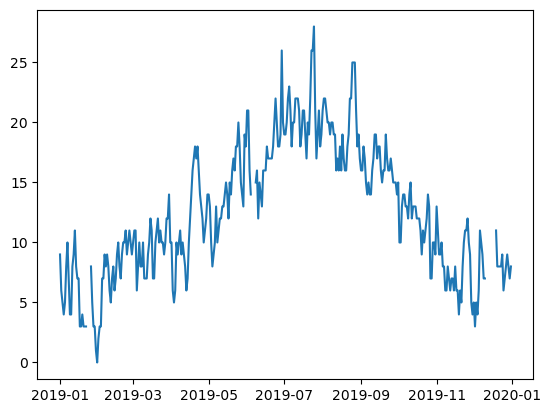

In [12]:
plt.plot(day_df.ReadingDateTime, day_df.DegreesCelcius)
plt.show()

It doesn't look that problematic to me.

    e.	How should we best deal with the missing values if our goal is to draw multiple boxplots that show the central tendency and variation of temperature across the months? Draw the described visualization after dealing with the missing values. 

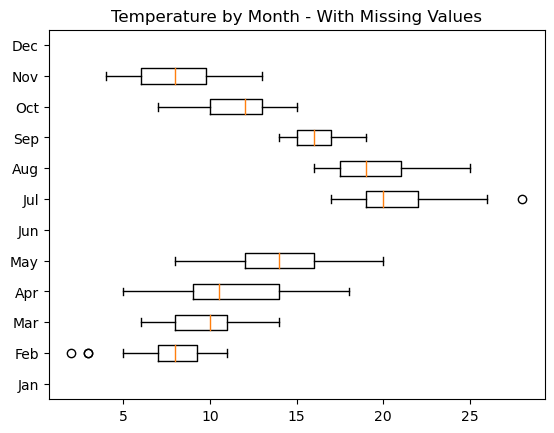

In [13]:
months_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
box_sr = pd.Series('',index = day_df.Month.unique())

for mo in day_df.Month.unique():
    BM = day_df.Month == mo
    box_sr[mo] = day_df[BM].DegreesCelcius
    
plt.boxplot(box_sr,vert=False)
plt.yticks(range(1,13),months_labels)
plt.title('Temperature by Month - With Missing Values')
plt.show()

Uh oh!!! Look at that! The boxplots don't work for the months that have missing data.

What are our options?
- Remove the rows with missing data
- Impute the missing data with a measue of central density (mean, median, mode)
- Interpolate the missing data

What makes sense here?

Well, that depends on the analysis. Our goal is to examine the central tendency and variation of temperature across the months. If we remove the rows with missing data, we will be removing the data that we are trying to examine. If we impute the missing data, we will be skewing the data. If we interpolate the missing data, we will be skewing the data. So it seems like we are stuck.

But, we are not because we are really only interested in the central tendency and variation of temperature across the months. We don't care about the individual values and we aren't looking at other attributes. So we can delete the observations with missing data and move on.

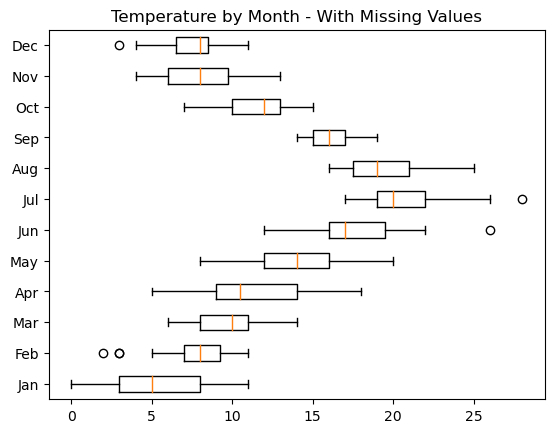

In [14]:
dropped_df = day_df.dropna()
months_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
box_sr = pd.Series('',index = dropped_df.Month.unique())

for mo in dropped_df.Month.unique():
    BM = dropped_df.Month == mo
    box_sr[mo] = dropped_df[BM].DegreesCelcius
    
plt.boxplot(box_sr,vert=False)
plt.yticks(range(1,13),months_labels)
plt.title('Temperature by Month - With Missing Values')
plt.show()

# Exercise 2
In this exercise, we are going to use the file ‘Iris_wMV.csv’. Iris data includes 50 samples of three types of iris flowers, totaling 150 rows of data. Each flower is described by its sepal and petal length or width. The column PetalLengthCm has some missing values.

    a. Confirm that PetalLengthCm has five missing values.  

In [15]:
#iris_df = pd.read_csv('Iris_wMV.csv')
#iris_df

    b. Figure out the types of missing values (MCAR, MAR, MNAR).

    c.	How would you best deal with the missing values, if your end goal was to draw the following visualization? Comment on all the four different approaches of dealing with missing values in this chapter, citing why the approach would be or wouldn’t be appropriate.

d.	Draw the preceding figure twice, once after adopting the “keep as is” approach, and once after adopting “imputing with the central tendency of the appropriate iris Species”. Compare the two figures and comment on their differences.

# Exercise 3
In this exercise, we will be using ‘imdb_top_1000.csv’. More information about this dataset maybe found on this link: https://www.kaggle.com/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows. Perform the following steps for this dataset. 

    a.	Read the file into movie_df, and list the level Ⅰ data cleaning steps that the dataset needs. Implement the listed items, if any. 

In [16]:
movie_df = pd.read_csv('imdb_top_1000.csv')
movie_df.head(1)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"


*The columns are intuitively named and codeable.*  
*So lets check the data types.*

In [17]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


*The columns `Released_Year`, `Runtime`, and `Gross` are not in the appropriate data types.*  


In [18]:
# Let's start with year
movie_df.Released_Year.unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

In [19]:
# What is with the 'PG'?
movie_df[movie_df.Released_Year == 'PG']

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,https://m.media-amazon.com/images/M/MV5BNjEzYj...,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


In [20]:
# Seems like the 'PG' should be in the Certificate column not the Released_Year column
# There are other issues present in the Certificate column that we will problably need to address as Level3. 
movie_df.Certificate.unique()

array(['A', 'UA', 'U', 'PG-13', 'R', nan, 'PG', 'G', 'Passed', 'TV-14',
       '16', 'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'],
      dtype=object)

In [21]:
# We don't want to lose that information
movie_df.loc[966, 'Certificate'] = 'PG'
movie_df.loc[966]

Poster_Link      https://m.media-amazon.com/images/M/MV5BNjEzYj...
Series_Title                                             Apollo 13
Released_Year                                                   PG
Certificate                                                     PG
Runtime                                                    140 min
Genre                                    Adventure, Drama, History
IMDB_Rating                                                    7.6
Overview         NASA must devise a strategy to return Apollo 1...
Meta_score                                                    77.0
Director                                                Ron Howard
Star1                                                    Tom Hanks
Star2                                                  Bill Paxton
Star3                                                  Kevin Bacon
Star4                                                  Gary Sinise
No_of_Votes                                                 26

In [22]:
# So what about the year? Well google tells me that the movie was released in 1995
# This is technically Level 3 cleaning, but we are here, so let's fix it now...
movie_df.loc[966, 'Released_Year'] = '1995'
movie_df.loc[966]

Poster_Link      https://m.media-amazon.com/images/M/MV5BNjEzYj...
Series_Title                                             Apollo 13
Released_Year                                                 1995
Certificate                                                     PG
Runtime                                                    140 min
Genre                                    Adventure, Drama, History
IMDB_Rating                                                    7.6
Overview         NASA must devise a strategy to return Apollo 1...
Meta_score                                                    77.0
Director                                                Ron Howard
Star1                                                    Tom Hanks
Star2                                                  Bill Paxton
Star3                                                  Kevin Bacon
Star4                                                  Gary Sinise
No_of_Votes                                                 26

In [23]:
# This looks like it could be a datetime, but what happens when we extract the year? 
dates = pd.to_datetime(movie_df.Released_Year)
dates.dt.year

0      1994
1      1972
2      2008
3      1974
4      1957
       ... 
995    1961
996    1956
997    1953
998    1944
999    1935
Name: Released_Year, Length: 1000, dtype: int64

In [24]:
# It becomes an int. So let's just skip that interim step.
movie_df['Released_Year'] = pd.to_numeric(movie_df.Released_Year, downcast='integer')
movie_df['Released_Year'].unique()


array([1994, 1972, 2008, 1974, 1957, 2003, 1993, 2010, 1999, 2001, 1966,
       2002, 1990, 1980, 1975, 2020, 2019, 2014, 1998, 1997, 1995, 1991,
       1977, 1962, 1954, 1946, 2011, 2006, 2000, 1988, 1985, 1968, 1960,
       1942, 1936, 1931, 2018, 2017, 2016, 2012, 2009, 2007, 1984, 1981,
       1979, 1971, 1963, 1964, 1950, 1940, 2013, 2005, 2004, 1992, 1987,
       1986, 1983, 1976, 1973, 1965, 1959, 1958, 1952, 1948, 1944, 1941,
       1927, 1921, 2015, 1996, 1989, 1978, 1961, 1955, 1953, 1925, 1924,
       1982, 1967, 1951, 1949, 1939, 1937, 1934, 1928, 1926, 1920, 1970,
       1969, 1956, 1947, 1945, 1930, 1938, 1935, 1933, 1932, 1922, 1943],
      dtype=int16)

*The gross needs to be converted to numeric, but it has those commas that need to be removed. I would also rename it to say GrossUSD so that we know what units it is in.*

In [25]:
movie_df['GrossUSD'] = pd.to_numeric(movie_df.Gross.str.replace(',',''), errors='coerce')
movie_df.drop('Gross', axis=1, inplace=True)

*The Runtime needs to be converted to numeric, but it includes the unit (minutes).*

In [26]:
# Are all of the units the same?
movie_df.Runtime.str.split(' ', expand=True)[1].unique()
# Yes, they are all minutes, to we can drop the minutes part and convert to a numeric
# We should rename the column so that we now what units it is in...
movie_df['RuntimeMinutes'] = pd.to_numeric(movie_df.Runtime.str.split(' ', expand=True)[0], errors='coerce')
movie_df.drop('Runtime', axis=1, inplace=True)

In [27]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Poster_Link     1000 non-null   object 
 1   Series_Title    1000 non-null   object 
 2   Released_Year   1000 non-null   int16  
 3   Certificate     899 non-null    object 
 4   Genre           1000 non-null   object 
 5   IMDB_Rating     1000 non-null   float64
 6   Overview        1000 non-null   object 
 7   Meta_score      843 non-null    float64
 8   Director        1000 non-null   object 
 9   Star1           1000 non-null   object 
 10  Star2           1000 non-null   object 
 11  Star3           1000 non-null   object 
 12  Star4           1000 non-null   object 
 13  No_of_Votes     1000 non-null   int64  
 14  GrossUSD        831 non-null    float64
 15  RuntimeMinutes  1000 non-null   int64  
dtypes: float64(3), int16(1), int64(2), object(10)
memory usage: 119.3+ KB


    b.	We want to employ a Decision Tree Classificaiton algorithm using the following columns to predict the IMDB_rating: Certificate, Runtime, Genre, and Gross. For this analytics goals, list the level 2 data cleanings that need to be done, and then implement them.  

In [28]:
# It looks like we will need to unpack the Genre column
movie_df.Genre.unique()

array(['Drama', 'Crime, Drama', 'Action, Crime, Drama',
       'Action, Adventure, Drama', 'Biography, Drama, History',
       'Action, Adventure, Sci-Fi', 'Drama, Romance', 'Western',
       'Action, Sci-Fi', 'Biography, Crime, Drama',
       'Action, Adventure, Fantasy', 'Comedy, Drama, Thriller',
       'Adventure, Drama, Sci-Fi', 'Animation, Adventure, Family',
       'Drama, War', 'Crime, Drama, Fantasy', 'Comedy, Drama, Romance',
       'Crime, Drama, Mystery', 'Crime, Drama, Thriller',
       'Action, Drama, Mystery', 'Drama, Family, Fantasy', 'Drama, Music',
       'Biography, Comedy, Drama', 'Drama, Mystery, Sci-Fi',
       'Biography, Drama, Music', 'Crime, Mystery, Thriller',
       'Animation, Adventure, Drama', 'Animation, Drama, War',
       'Adventure, Comedy, Sci-Fi', 'Horror, Mystery, Thriller',
       'Drama, Romance, War', 'Comedy, Drama, Family',
       'Animation, Drama, Fantasy', 'Action, Biography, Drama',
       'Animation, Action, Adventure', 'Drama, Western',


In [29]:
movie_df[['Genre_1', 'Genre_2', 'Genre_3']] = movie_df.Genre.str.split(', ', expand=True)
movie_df.drop('Genre', axis=1, inplace=True)

Remember when we looked at the Certificate column and say that there wasn't consistency in how data was encoded? Well, let't dig deeper.

In [30]:
movie_df.Certificate.value_counts()

U           233
A           197
UA          175
R           146
PG-13        43
PG           38
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: Certificate, dtype: int64

At a minimum, we should convert the U/A to a UA. The different rating systems are more complicated because it would be nice if they were all consistent, but it also adds information (which market the movie targeted). I am only going to fix the U/A issue, but to improve the accuracy of our model, we would want to spend time on this column.



In [31]:
movie_df.loc[movie_df.Certificate == 'U/A']

,Poster_Link,Series_Title,Released_Year,Certificate,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,GrossUSD,RuntimeMinutes,Genre_1,Genre_2,Genre_3
878,https://m.media-amazon.com/images/M/MV5BMjIwOT...,Searching,2018,U/A,7.6,"After his teenage daughter goes missing, a des...",71.0,Aneesh Chaganty,John Cho,Debra Messing,Joseph Lee,Michelle La,140840,26020957.0,102,Drama,Mystery,Thriller


In [32]:
movie_df.loc[878, 'Certificate'] = 'UA'
movie_df.iloc[878]

Poster_Link       https://m.media-amazon.com/images/M/MV5BMjIwOT...
Series_Title                                              Searching
Released_Year                                                  2018
Certificate                                                      UA
IMDB_Rating                                                     7.6
Overview          After his teenage daughter goes missing, a des...
Meta_score                                                     71.0
Director                                            Aneesh Chaganty
Star1                                                      John Cho
Star2                                                 Debra Messing
Star3                                                    Joseph Lee
Star4                                                   Michelle La
No_of_Votes                                                  140840
GrossUSD                                                 26020957.0
RuntimeMinutes                                  

    c.	Does the dataset have issues, regarding missing values? If yes, how best should we deal with them given the listed data analytic goals in b. 

In [33]:
movie_df[['Certificate', 'RuntimeMinutes', 'Genre_1', 'Genre_2', 'Genre_3', 'GrossUSD', 'IMDB_Rating']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Certificate     899 non-null    object 
 1   RuntimeMinutes  1000 non-null   int64  
 2   Genre_1         1000 non-null   object 
 3   Genre_2         895 non-null    object 
 4   Genre_3         646 non-null    object 
 5   GrossUSD        831 non-null    float64
 6   IMDB_Rating     1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


There are missing values... Fortunately, not in the target attribute, but DecisionTreeRegressor will not run with missing values.

In [34]:
# we want to know if we messed with the data
movie_df['GrossUSDMissing'] = movie_df.GrossUSD.isna()
# mean seems reasonable for movie gross... probably would want to try harder on a real project and break out the stats to make sure though.
movie_df.GrossUSD = movie_df.GrossUSD.fillna(movie_df.GrossUSD.mean())

movie_df['CertificateMissing'] = movie_df.Certificate.isna()
movie_df.Certificate = movie_df.Certificate.fillna('Not Rated') # Unrated could mean sometime specific, though with research it might prove ok.

# If there is no Genre_2, then duplicate the Genre_1
movie_df['Genre_2Missing'] = movie_df.Genre_2.isna()
movie_df.Genre_2 = movie_df.Genre_2.fillna(movie_df.Genre_1)

# If there is no Genre_3, then duplicate the Genre_2
movie_df['Genre_3Missing'] = movie_df.Genre_3.isna()
movie_df.Genre_3 = movie_df.Genre_3.fillna(movie_df.Genre_2)

    d.	Use the following function from sklearn.tree to create a prediction model that can predict IMDB_rating using Certificate, Runtime, Genre and Gross: 
    
*DecisionTreeRegressor(max_depth=5, min_impurity_decrease=0, min_samples_split=20, splitter='random')*

    The tuning parameters have been set for you so the DecsionTreeRegressor can perform better. Once the model is trained draw the trained tree and check if the attribute Gross is used for the prediction of IMDB_rating. 

In [35]:
# It is easy to miss in the book, but categorical data needs to be encoded numerically in order for the model to use it
# I use LabelEncoder, but there are other options
# The book creates a dictionary to map the values to numbers, which is also fine.
# See page 318 for an example
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(movie_df.Certificate.unique())
movie_df['CertificateEnc'] = le.transform(movie_df.Certificate)
le = LabelEncoder()
le.fit(movie_df.Genre_1.unique())
movie_df['Genre_1Enc'] = le.transform(movie_df.Genre_1)
le = LabelEncoder()
le.fit(movie_df.Genre_2.unique())
movie_df['Genre_2Enc'] = le.transform(movie_df.Genre_2)
le = LabelEncoder()
le.fit(movie_df.Genre_3.unique())
movie_df['Genre_3Enc'] = le.transform(movie_df.Genre_3)

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


predictors = ['CertificateEnc', 'RuntimeMinutes', 'Genre_1Enc', 'Genre_2Enc', 'Genre_3Enc', 'GrossUSD']
target = 'IMDB_Rating'
Xs = movie_df[predictors]
y = movie_df[target]

# This is a better way of creating the training and test sets that the method the book uses.
# The book just reserves the last 20 rows for testing, which is fine, but this is much more robust
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2)

In [37]:
RegressTree = DecisionTreeRegressor(max_depth=5, min_impurity_decrease=0, min_samples_split=20 , splitter='random')
RegressTree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_impurity_decrease=0,
                      min_samples_split=20, splitter='random')

    e.	Run the following code and then explain what summary_df is.

```
dt_predicted_IMDB_rating = RegressTree.predict(Xs)
mean_predicted_IMDB_rating = np.ones(len(y))*y.mean()
summary_df = pd.DataFrame({'Prediction by Decision Tree': dt_predicted_IMDB_rating, 'Prediction by mean': mean_predicted_IMDB_rating, 'Actual IMDB_rating': y})
```

In [38]:
# Notice that I am using X_test and y_test here. That means that I am using a completely different set of data
# than I used to train the model. This separation will give me a better estimate of the performance of the model.
dt_predicted_IMDB_rating = RegressTree.predict(X_test)
mean_predicted_IMDB_rating = np.ones(len(y_test)) * y_test.mean()
summary = {'Prediction by Decision Tree': dt_predicted_IMDB_rating, 'Prediction by mean': mean_predicted_IMDB_rating, 'Actual IMDB_rating': y_test}
summary_df = pd.DataFrame(summary)
summary_df.head(10)

,Prediction by Decision Tree,Prediction by mean,Actual IMDB_rating
866,7.930469,7.9115,7.7
540,7.879767,7.9115,7.9
629,8.069231,7.9115,7.8
545,7.874000,7.9115,7.9
248,7.788889,7.9115,8.1
62,7.994000,7.9115,8.4
947,8.250000,7.9115,7.6
67,7.994000,7.9115,8.4
782,8.069231,7.9115,7.7
814,7.879767,7.9115,7.7


*The dataframe contains the actual IMDB_rating, the prediction by the mean, and the prediction by the Decision Tree. This information will help us to understand how succesful our model is at predicting the IMDB rating*

    f.	Run the following code and explain the visualizaiton it creates. What can you learn from the visualization? 

```
summary_df['Decision Tree Error'] = abs(summary_df['Prediction by Decision Tree']- summary_df['Actual IMDB_rating'])
summary_df['Mean Error'] = abs(summary_df['Prediction by mean'] - summary_df['Actual IMDB_rating'])
plt.figure(figsize=(2,10))
table = summary_df[['Decision Tree Error','Mean Error']]
sns.heatmap(table, cmap='Greys')
```

<Axes: >

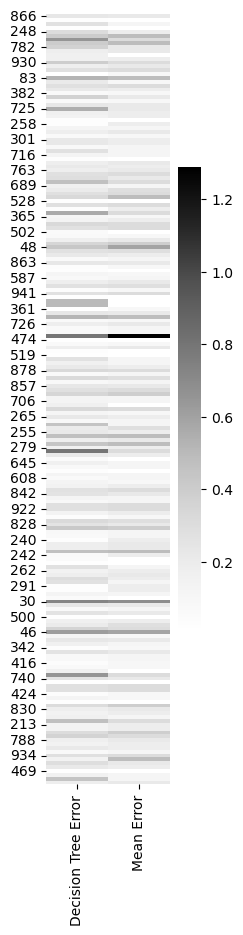

In [39]:
summary_df['Decision Tree Error'] = abs(summary_df['Prediction by Decision Tree']- summary_df['Actual IMDB_rating'])
summary_df['Mean Error'] = abs(summary_df['Prediction by mean'] - summary_df['Actual IMDB_rating'])
plt.figure(figsize=(2,10))
table = summary_df[['Decision Tree Error','Mean Error']]
sns.heatmap(table, cmap='Greys')

*This image allows us to compare the error of the Decision Tree model to the error of the mean model. We can see that my model has some improvement. Maybe you put more work into preparing the data and got a better result. Often the data preparation is just as important as the tuning of the model.*

# Exercise 4
In this exercise, we will be using two CSV files: responses.csv and columns.csv. The two files are used to record the date of a survey conducted in Slovakia. To access the data on Kaggle.com use this link: https://www.kaggle.com/miroslavsabo/young-people-survey. Perform the following items for this data source. 

In [40]:
column_df = pd.read_csv('columns.csv')
column_df.head(2)

,original,short
0,I enjoy listening to music.,Music
1,I prefer.,Slow songs or fast songs


In [41]:
response_df = pd.read_csv('responses.csv')
response_df.head(2)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats


    a.	Are there respondents in this survey that are suspected to be outliers based on their age? How many? list them in a separate data frame.

    b.	Are there respondents in this survey that are suspected to be outliers based on their level of liking for Country and Hardrock music? How many? list them in a separate data frame.

	c. Are there respondents in this survey that are suspected to be outliers based on their BMI or Education level? How many? list them in a separate data frame. BMI can be calculated using the following formula. 
    
`BMI=Weight/Height^2`

    The Weight has to be in kilograms and height in meters for the following formula. In the dataset, Weight is recorded in kilograms but Height is recorded in centimeters and has to be transformed to Meter.


    d.	Are there respondents in this survey that are suspected to be outliers based on their BMI and Age? How many? list them in a separate data frame.

    e.	Are there respondents in this survey that are suspected to be outliers based on their BMI and Gender? How many? list them in a separate data frame.

# Exercise 5
One of the most common approaches for fraud detection is using outlier detection. In this exercise, you will use 'creditcard.csv' from https://www.kaggle.com/mlg-ulb/creditcardfraud  to evaluate the effectiveness of outlier detection for credit card fraud detection. Pay attention that most of the columns in this data source are processed values to uphold data anonymity. Perform the following steps.

    a.	Check the state of the dataset for missing values and address them if any.

In [42]:
transaction_df = pd.read_csv('creditcard.csv')
transaction_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [43]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [44]:
# I don't see any but just to be sure...
transaction_df.isna().sum().sum()

0

*There are no missing values in this dataset. If there were, then we would want to make sure that we filled with a value that did not skew the data. Therefore we would want to use the upper cap.*

In [45]:
# what is in time?
transaction_df.Time.describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

In [46]:
# time is not a meaningful variable in this case, so we can drop it
transaction_df.drop('Time', axis=1, inplace=True)

    b.	Using the column Class, which shows if the transaction has been fraudulent or not, find out what percentage of the transactions in the dataset are fraudulent. 

In [47]:
transaction_df.Class.value_counts() / len(transaction_df)

0    0.998273
1    0.001727
Name: Class, dtype: float64

*Less than 0.2% of the transactions are fraudulent.* 

    c.	Using data visualization or the appropriate statistical set, and if necessary both, specify which univariate outliers have a relationship with the column Class? In other words, if the values of which column are outliers then we may suspect fraudulent activity? Which statistical test is appropriate here? 

*I have to admit to being confused by this. Based on reading the chapter, I would think that the answer to this question is using the K-Means clustering algorithm and centroid heatmap to answer this question, but that is what the next question is asking for. I think that this is looking for some kind of chi2 test and a contingency table.*

Unfortunately, my kernel kept crashing when I attempted that.  I don't have an example right now...

    d.	First, use the K-Means algorithm to group the transactions into 200 clusters by the attributes that were found to have a relationship with the column Class in part c. Then, filter out the members of the clusters with less than 50 transactions. Does any of them contain significantly fraudulent transactions? 

In [48]:
from sklearn.cluster import KMeans
dimensions = [att for att in transaction_df.columns if att != 'Class']
print(dimensions)
Xs = transaction_df[dimensions]
# Don't forget to normalize the data. KMeans is a distance-based algorithm.
Xs = (Xs - Xs.min()) / (Xs.max() - Xs.min())
kmeans = KMeans(n_clusters=200)
kmeans.fit(Xs)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


/opt/homebrew/Caskroom/miniforge/base/envs/inst447-sp23/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=200)

In [59]:
for i in range(200):
    if len(kmeans.labels_[kmeans.labels_ == i]) < 50:
        print(f'Cluster {i} has {len(kmeans.labels_[kmeans.labels_ == i])} members')
    transaction_df.loc[kmeans.labels_ == i, 'Cluster'] = i

Cluster 14 has 38 members
Cluster 130 has 7 members
Cluster 193 has 45 members


    e.	If there are any clusters with significant fraudulent transactions, perform centroid analysis for them. 

In [60]:
# Page 205
import seaborn as sns
clusters = ['Cluster {}'.format(i) for i in [14, 130, 193]]
print(clusters)

['Cluster 14', 'Cluster 130', 'Cluster 193']


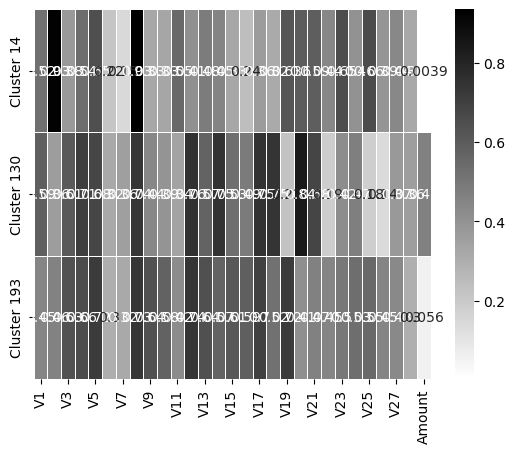

In [62]:
Centroids = pd.DataFrame(0.0, index =  clusters,
                        columns = Xs.columns)
for clst in clusters:
    i  = int(clst.split(' ')[1])
    BM = kmeans.labels_==i
    Centroids.loc[clst] = Xs[BM].median(axis=0)

sns.heatmap(Centroids, linewidths=.5, annot=True, 
                    cmap='binary')
plt.show()

In [ ]:
import seaborn as sns

sns.pairplot(transaction_df, hue='Class')

# Exercise 6
In Chapter 5 and Chapter 8 we used ‘WH Report_preprocessed.csv’ which is the preprocessed version of ‘WH Report.csv’. Now that you have learned numerous data preprocessing skills, you will be preprocessing the dataset yourself.

    a.	Check the status of the dataset for missing values. 

In [49]:
country_df = pd.read_csv('WH Report.csv')
country_df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [50]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


    b.	Check the status of the dataset for outliers.

In [51]:
country_df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


    c.	We would like to cluster the countries based on their happiness indices over the years. Based on these analytic goals, address the missing values.

    d.	Based on the listed goal in c, address the outliers.

    e.	Does data need any level Ⅰ or level Ⅱ data cleaning, before clustering is possible? If any, prepare the dataset for k-means clustering.

    f.	Perform K-means clustering to separate the countries into three groups, and do all the possible analytics that one does when clustering.

# Exercise 7

Specify if the following items describe random errors or systematic errors.

    a.	The data has these types of errors as the thermometer that the lab has purchased can give precise readings to one-thousandth of a degree
    b.	The data has these types of errors the survey records were gathered by 5 different surveyors who attended 5 rigorous training sessions
    c.	The data has these types of errors because when asking for salary questions in a survey there were no options such as “I would not like to share”
    d.	The data has these types of errors because the cameras were tampered with so the rubbery would not be tapped. 


# Exercise 8
Study Figure 11.14 one more time, and run the first three Exercises by the flowchart in this figure and note down the path that led to our decisions regarding the missing values. Did we take steps in dealing with missing values that were not listed in this figure or this chapter? Would it be better to have a more complex figure so every possibility would be included, or not? Why or why not?

# Exercise 9
Explain why the following statement is incorrect: A row may have a significant number of MCAR missing values.